In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df=pd.read_csv("breast_cancer.csv")

In [3]:
df.head(5)

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.describe()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Task1

In [6]:
profile_tab = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Min': [df[col].min() if df[col].dtype != 'object' else np.nan for col in df.columns],
    'Max': [df[col].max() if df[col].dtype != 'object' else np.nan for col in df.columns]
})
profile_tab.index = range(11)

In [7]:
profile_tab

,Column Name,Data Type,Unique Values,Min,Max
0,Sample code,int64,645,61634.0,13454352.0
1,Clump Thickness,int64,10,1.0,10.0
2,Uniformity of Cell Size,int64,10,1.0,10.0
3,Uniformity of Cell Shape,int64,10,1.0,10.0
4,Marginal Adhesion,int64,10,1.0,10.0
5,Single Epithelial Cell Size,int64,10,1.0,10.0
6,Bare Nuclei,object,11,NaN,NaN
7,Bland Chromatin,int64,10,1.0,10.0
8,Normal Nucleoli,int64,10,1.0,10.0
9,Mitoses,int64,9,1.0,10.0


## Task2

In [8]:
df1=pd.read_csv("ds_salaries.csv")

In [9]:
df1.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1926,2022,MI,FT,Data Engineer,75000,GBP,92350,GB,100,GB,M
3337,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
1321,2023,SE,FT,Computer Vision Software Engineer,50000,EUR,53654,NL,100,CA,L
1975,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
1737,2023,MI,FT,Data Engineer,100000,USD,100000,US,0,US,M


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [11]:
profile_tab1 = pd.DataFrame({
    'Column Name': df1.columns,
    'Data Type': df1.dtypes,
    'Unique Values': [df1[col].nunique() for col in df1.columns],
    'Min': [df1[col].min() if df1[col].dtype != 'object' else np.nan for col in df1.columns],
    'Max': [df1[col].max() if df1[col].dtype != 'object' else np.nan for col in df1.columns]
})
profile_tab1.index = range(11)

In [12]:
profile_tab1

,Column Name,Data Type,Unique Values,Min,Max
0,work_year,int64,4,2020.0,2023.0
1,experience_level,object,4,NaN,NaN
2,employment_type,object,4,NaN,NaN
3,job_title,object,93,NaN,NaN
4,salary,int64,815,6000.0,30400000.0
5,salary_currency,object,20,NaN,NaN
6,salary_in_usd,int64,1035,5132.0,450000.0
7,employee_residence,object,78,NaN,NaN
8,remote_ratio,int64,3,0.0,100.0
9,company_location,object,72,NaN,NaN


In [13]:
df1.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
df1.nlargest(n=5, columns=['salary_in_usd'])[['job_title','salary_in_usd']]

,job_title,salary_in_usd
3522,Research Scientist,450000
2011,Data Analyst,430967
528,AI Scientist,423834
3747,Applied Machine Learning Scientist,423000
3675,Principal Data Scientist,416000


<Axes: >

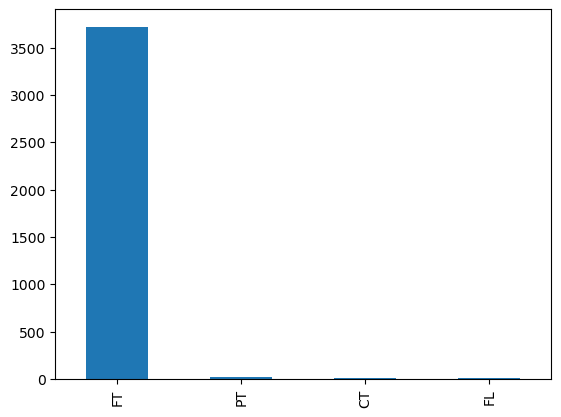

In [15]:
df1['employment_type'].value_counts().plot(kind='bar')

In [16]:
df1.groupby('company_size')['salary_in_usd'].mean()

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

In [17]:
df1.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False)

salary_currency
ILS    423834.000000
USD    149366.906638
CHF    100682.000000
CAD     96707.400000
GBP     83850.229814
SGD     81770.000000
AUD     74198.444444
HKD     65062.000000
EUR     62281.733051
JPY     60921.333333
CLP     40038.000000
PLN     34165.200000
MXN     33511.000000
DKK     31192.666667
HUF     29892.666667
THB     27096.500000
INR     25785.300000
TRY     20096.666667
BRL     12448.000000
CZK      5132.000000
Name: salary_in_usd, dtype: float64

## Preprocessing

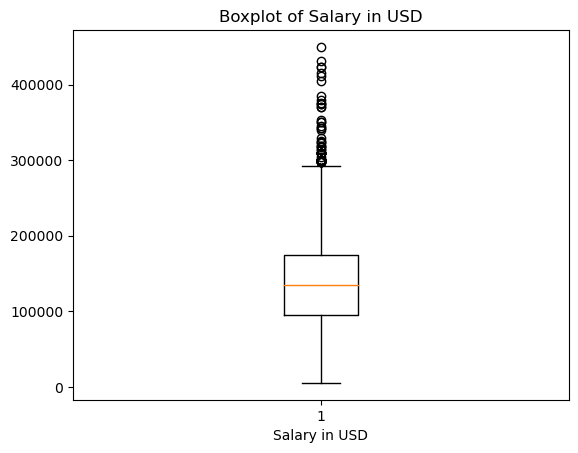

In [18]:
boxplot =plt.boxplot(df1['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()

In [19]:
outliers = boxplot['fliers'][0].get_data()[0]
outlier_count = len(outliers)
outlier_count

63

We can see in above plot that Salaries greater than 290,000 are considered to be outliers which can be dropped when doing analysis.

In [20]:
df1=df1[df1['salary_in_usd']<290000]

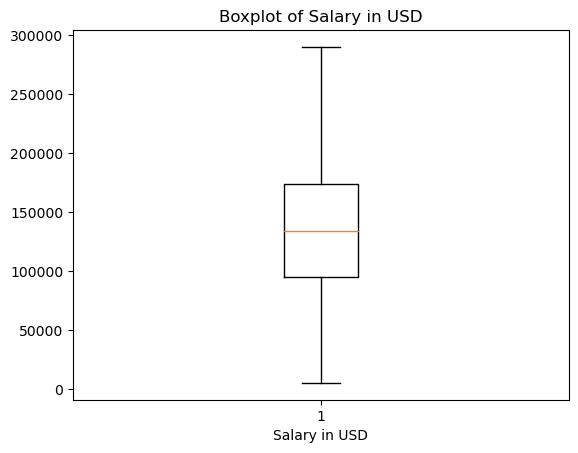

In [21]:
boxplot =plt.boxplot(df1['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()